### Reading necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

### Problem Statement:

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

### Train data

In [2]:
train=pd.read_csv('Trainsales.csv')
train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Test Data

In [3]:
test=pd.read_csv('Testsales.csv')
test.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
train['Data']='train'

In [5]:
test['Data']='test'

In [6]:
test['Item_Outlet_Sales']=np.nan

In [7]:
# Combining train and test data

In [8]:
combined=pd.concat([train,test],ignore_index=True,sort=False)
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Data
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


### Data Visualisation:

### Univariate Analysis:

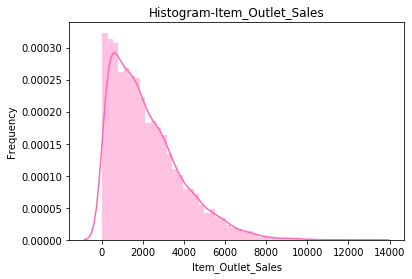

In [10]:
# Target variable: Item_outlet_sales
sns.distplot(train['Item_Outlet_Sales'],color='hotpink')
plt.xlabel='Sales'
plt.ylabel('Frequency')
plt.title('Histogram-Item_Outlet_Sales')
plt.show()

In [11]:
#Inference
#1.Sales appears to be skewed
#2.In +ve skew-mean>median>mode and vice-versa

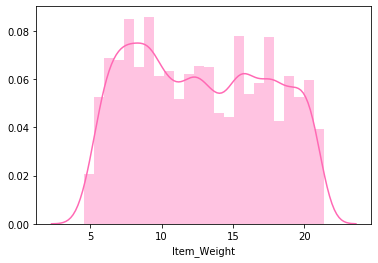

In [12]:
#seaborn library cannot use missing values
sns.distplot(combined['Item_Weight'].dropna(),color='hotpink')
#Item_weight is uniform,neither +ve,-ve skewed,so we cant use mean,median or mode for missing values

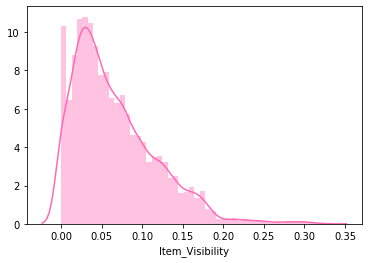

In [13]:
#Item_visibility
sns.distplot(combined['Item_Visibility'],color='hotpink')
#positively skewed

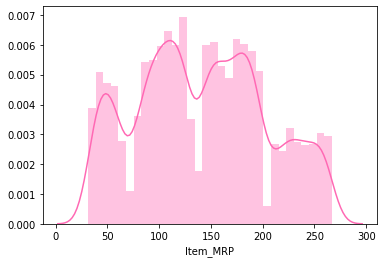

In [14]:
#Item_mrp
sns.distplot(combined['Item_MRP'],color='hotpink')

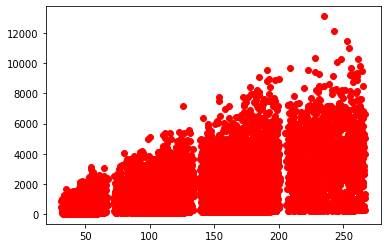

In [15]:
# It clearly shows that there is a cluster and 4 different groups are created
plt.scatter(combined.Item_MRP,combined.Item_Outlet_Sales,color='red')

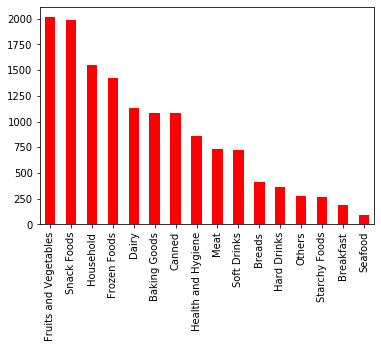

In [16]:
combined.Item_Type.value_counts().plot(kind='bar',color='red')

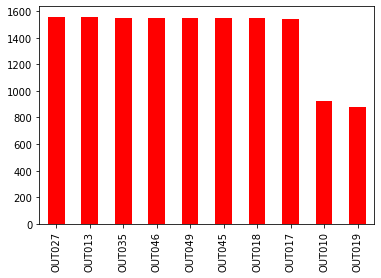

In [17]:
combined.Outlet_Identifier.value_counts().plot(kind='bar',color='red')

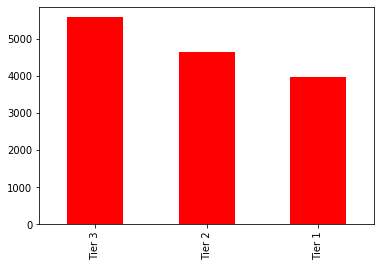

In [18]:
combined.Outlet_Location_Type.value_counts().plot(kind='bar',color='red')

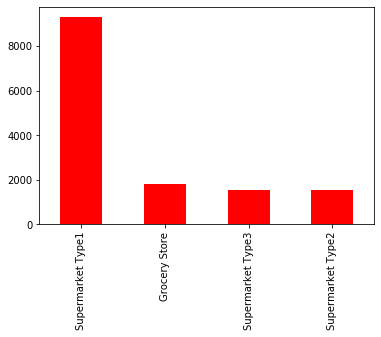

In [19]:
combined.Outlet_Type.value_counts().plot(kind='bar',color='red')

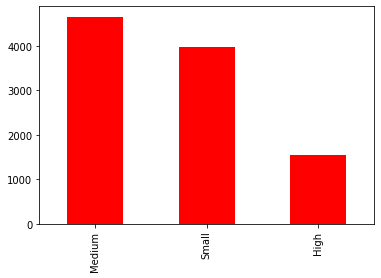

In [20]:
combined.Outlet_Size.value_counts().plot(kind='bar',color='red')

### Summary:

1.Sales is skewed because of outliers.

2.Item wt has missing values and shows no pattern in histogram.

3.Item Mrp shows 4 data distributions,need to expolre more.

4There are two types of prod sold-reg and low fat.

5.Item visbility has lots of 0 values-need to treat this and it is skewed which means that there are prod which have higher visibilty in comp to others.

6.Outlet size is mostly medium wherein the types of outlets is s1 and most of the cities where these store are tier 3 cities.

7.Top 5 prod that sell in these stores are fruits and veggies,snack foods,dairy,frozen food followed by household items.

### Bivariate Analysis:

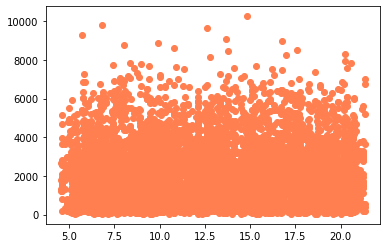

In [21]:
#Item wt vs Sales:
plt.scatter(combined.Item_Weight,combined.Item_Outlet_Sales,color='coral')
#No pattern

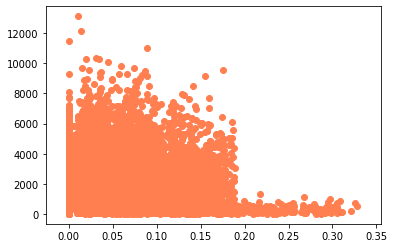

In [22]:
#Item visibility vs Item Outlet sales:
plt.scatter(combined.Item_Visibility,combined.Item_Outlet_Sales,color='coral')

<Figure size 360x360 with 0 Axes>

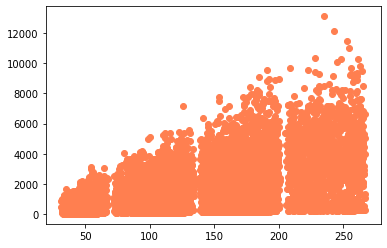

<Figure size 360x360 with 0 Axes>

In [23]:
# Item MRP vs Item outlet sales:
plt.scatter(combined.Item_MRP,combined.Item_Outlet_Sales,color='coral')
plt.figure(figsize=[5,5]) #Modifying the dimensions

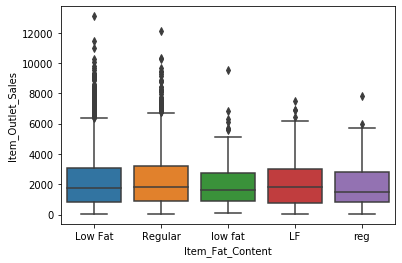

In [24]:
#Bivariate: Categorical vs Numerical : Item_Fat_Content vs sales:
sns.boxplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=combined)
#IQR=Q3-Q1
#min=q1-1.5*iqr
#max=q3+1.5*iqr

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

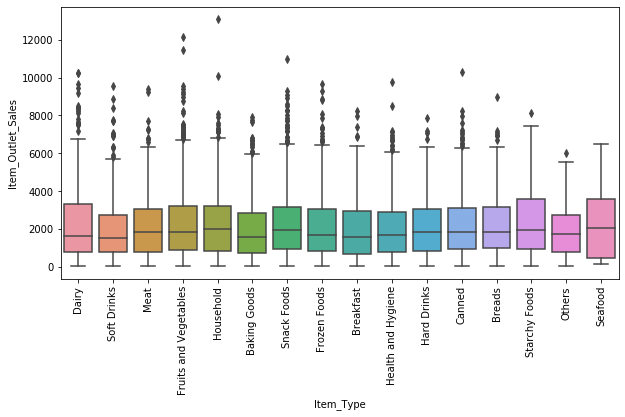

In [25]:
# Item type vs Item outlet sales:
plt.figure(figsize=[10,5])
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',data=combined)
plt.xticks(rotation=90)

### Checking for null values:

In [26]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Item_Weight          2439
Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64

### Imputing null values:

In [27]:
combined.groupby('Item_Identifier')['Item_Weight'].mean()

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
          ...  
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: Item_Weight, Length: 1559, dtype: float64

In [28]:
combined['Item_Weight']=combined.groupby('Item_Identifier')['Item_Weight'].transform(lambda x:x.fillna(x.mean()))

In [29]:
combined.groupby('Item_Identifier')['Item_Weight'].mean()

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
          ...  
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: Item_Weight, Length: 1559, dtype: float64

In [30]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64

In [31]:
pd.DataFrame(combined.groupby(['Outlet_Location_Type','Outlet_Type'])['Outlet_Size'].value_counts())

Outlet_Size
Outlet_Location_Type Outlet_Type       Outlet_Size             
Tier 1               Grocery Store     Small                880
                     Supermarket Type1 Medium              1550
                                       Small               1550
Tier 2               Supermarket Type1 Small               1550
Tier 3               Supermarket Type1 High                1553
                     Supermarket Type2 Medium              1546
                     Supermarket Type3 Medium              1559

In [32]:
a=combined[combined['Outlet_Size'].isnull()]
a

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Data
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,train
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,train
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080,train
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14191,FDC44,15.600,Low Fat,0.288892,Fruits and Vegetables,115.1518,OUT010,1998,NaN,Tier 3,Grocery Store,NaN,test
14193,FDO03,10.395,Regular,0.037092,Meat,229.4352,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
14201,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


In [33]:
pd.DataFrame(a.groupby(['Outlet_Location_Type','Outlet_Type'])['Outlet_Identifier'].value_counts())

Outlet_Identifier
Outlet_Location_Type Outlet_Type       Outlet_Identifier                   
Tier 2               Supermarket Type1 OUT045                          1548
                                       OUT017                          1543
Tier 3               Grocery Store     OUT010                           925

In [34]:
combined.loc[(combined.Outlet_Location_Type=='Tier 2')&(combined.Outlet_Type=='Supermarket Type1'),'Outlet_Size']='Small'

In [35]:
combined.loc[(combined.Outlet_Location_Type=='Tier 3')&(combined.Outlet_Type=='Grocery Store'),'Outlet_Size']='Small'

In [36]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Item_Outlet_Sales    5681
dtype: int64

In [37]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Data
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [38]:
combined['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [39]:
combined['Item_Fat_Content']=combined['Item_Fat_Content'].replace(['low fat'],['Low Fat'])

In [40]:
combined['Item_Fat_Content']=combined['Item_Fat_Content'].replace(['LF'],['Low Fat'])

In [41]:
combined['Item_Fat_Content']=combined['Item_Fat_Content'].replace(['reg'],['Regular'])

In [42]:
combined['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [43]:
combined.Item_Type.value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [44]:
combined.Item_Type.value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [45]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Data
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


### Feature Engineering:

In [46]:
combined['Years']=2013-combined.Outlet_Establishment_Year

In [47]:
def size(x):
    if x=='Small':
        x=0
    elif x=='Medium':
        x=1
    elif x=='High':
        x=2
    return x
combined['Outlet_Size']=combined['Outlet_Size'].apply(size)

In [48]:
combined.Item_Visibility=combined.groupby('Item_Identifier')['Item_Visibility'].transform(lambda x:x.replace(0,x.median()))

In [49]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Data,Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,1,Tier 1,Supermarket Type1,3735.1380,train,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,1,Tier 3,Supermarket Type2,443.4228,train,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,1,Tier 1,Supermarket Type1,2097.2700,train,14
3,FDX07,19.20,Regular,0.022914,Fruits and Vegetables,182.0950,OUT010,1998,0,Tier 3,Grocery Store,732.3800,train,15
4,NCD19,8.93,Low Fat,0.013177,Household,53.8614,OUT013,1987,2,Tier 3,Supermarket Type1,994.7052,train,26


In [50]:
combined['Price_Per_Unit']=combined.Item_MRP/combined.Item_Weight

In [51]:
combined.Item_Identifier[0][:2]

'FD'

In [52]:
ids=[]
for i in combined.Item_Identifier:
    ids.append(i[:2])

In [53]:
combined['ID_Cat']=pd.Series(ids)

In [54]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Data,Years,Price_Per_Unit,ID_Cat
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,1,Tier 1,Supermarket Type1,3735.1380,train,14,26.861204,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,1,Tier 3,Supermarket Type2,443.4228,train,4,8.153581,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,1,Tier 1,Supermarket Type1,2097.2700,train,14,8.092457,FD
3,FDX07,19.20,Regular,0.022914,Fruits and Vegetables,182.0950,OUT010,1998,0,Tier 3,Grocery Store,732.3800,train,15,9.484115,FD
4,NCD19,8.93,Low Fat,0.013177,Household,53.8614,OUT013,1987,2,Tier 3,Supermarket Type1,994.7052,train,26,6.031512,NC


In [55]:
combined.Item_Type.value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [56]:
combined.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [57]:
combined.ID_Cat.value_counts()

FD    10201
NC     2686
DR     1317
Name: ID_Cat, dtype: int64

In [58]:
pd.DataFrame(combined.groupby('ID_Cat')['Item_Type'].value_counts())

Item_Type
ID_Cat Item_Type                       
DR     Soft Drinks                  726
       Hard Drinks                  362
       Dairy                        229
FD     Fruits and Vegetables       2013
       Snack Foods                 1989
       Frozen Foods                1426
       Baking Goods                1086
       Canned                      1084
       Dairy                        907
       Meat                         736
       Breads                       416
       Starchy Foods                269
       Breakfast                    186
       Seafood                       89
NC     Household                   1548
       Health and Hygiene           858
       Others                       280

In [59]:
combined.loc[combined.ID_Cat=='NC','Item_Type']='Non Eatables'

In [60]:
pd.DataFrame(combined.groupby('ID_Cat')['Item_Type'].value_counts())

Item_Type
ID_Cat Item_Type                       
DR     Soft Drinks                  726
       Hard Drinks                  362
       Dairy                        229
FD     Fruits and Vegetables       2013
       Snack Foods                 1989
       Frozen Foods                1426
       Baking Goods                1086
       Canned                      1084
       Dairy                        907
       Meat                         736
       Breads                       416
       Starchy Foods                269
       Breakfast                    186
       Seafood                       89
NC     Non Eatables                2686

In [61]:
combined.loc[combined.ID_Cat=='FD','Item_Type']='Food'

In [62]:
combined.loc[combined.ID_Cat=='DR','Item_Type']='Drinks'

In [63]:
pd.DataFrame(combined.groupby('ID_Cat')['Item_Type'].value_counts())

,,Item_Type
ID_Cat,Item_Type,
DR,Drinks,1317
FD,Food,10201
NC,Non Eatables,2686


In [64]:
combined.loc[combined.ID_Cat=='NC','Item_Fat_Content']='Non Edible'

In [65]:
pd.DataFrame(combined.groupby('ID_Cat')['Item_Fat_Content'].value_counts())

Item_Fat_Content
ID_Cat Item_Fat_Content                  
DR     Low Fat                       1208
       Regular                        109
FD     Low Fat                       5291
       Regular                       4910
NC     Non Edible                    2686

In [66]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Data,Years,Price_Per_Unit,ID_Cat
0,FDA15,9.30,Low Fat,0.016047,Food,249.8092,OUT049,1999,1,Tier 1,Supermarket Type1,3735.1380,train,14,26.861204,FD
1,DRC01,5.92,Regular,0.019278,Drinks,48.2692,OUT018,2009,1,Tier 3,Supermarket Type2,443.4228,train,4,8.153581,DR
2,FDN15,17.50,Low Fat,0.016760,Food,141.6180,OUT049,1999,1,Tier 1,Supermarket Type1,2097.2700,train,14,8.092457,FD
3,FDX07,19.20,Regular,0.022914,Food,182.0950,OUT010,1998,0,Tier 3,Grocery Store,732.3800,train,15,9.484115,FD
4,NCD19,8.93,Non Edible,0.013177,Non Eatables,53.8614,OUT013,1987,2,Tier 3,Supermarket Type1,994.7052,train,26,6.031512,NC


In [67]:
df=combined.copy()

### Dropping unnecessary columns:

In [68]:
df.drop(['Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [69]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Data,Years,Price_Per_Unit,ID_Cat
0,9.30,Low Fat,0.016047,Food,249.8092,1,Tier 1,Supermarket Type1,3735.1380,train,14,26.861204,FD
1,5.92,Regular,0.019278,Drinks,48.2692,1,Tier 3,Supermarket Type2,443.4228,train,4,8.153581,DR
2,17.50,Low Fat,0.016760,Food,141.6180,1,Tier 1,Supermarket Type1,2097.2700,train,14,8.092457,FD
3,19.20,Regular,0.022914,Food,182.0950,0,Tier 3,Grocery Store,732.3800,train,15,9.484115,FD
4,8.93,Non Edible,0.013177,Non Eatables,53.8614,2,Tier 3,Supermarket Type1,994.7052,train,26,6.031512,NC


### Creating dummies for categorical columns:

In [70]:
df=pd.get_dummies(df,columns=['Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Type','ID_Cat'],drop_first=True)

In [71]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Item_Outlet_Sales,Data,Years,Price_Per_Unit,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Item_Type_Food,Item_Type_Non Eatables,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,ID_Cat_FD,ID_Cat_NC
0,9.30,0.016047,249.8092,1,3735.1380,train,14,26.861204,0,0,1,0,0,0,1,0,0,1,0
1,5.92,0.019278,48.2692,1,443.4228,train,4,8.153581,0,1,0,0,0,1,0,1,0,0,0
2,17.50,0.016760,141.6180,1,2097.2700,train,14,8.092457,0,0,1,0,0,0,1,0,0,1,0
3,19.20,0.022914,182.0950,0,732.3800,train,15,9.484115,0,1,1,0,0,1,0,0,0,1,0
4,8.93,0.013177,53.8614,2,994.7052,train,26,6.031512,1,0,0,1,0,1,1,0,0,0,1


In [72]:
df.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Size',
       'Item_Outlet_Sales', 'Data', 'Years', 'Price_Per_Unit',
       'Item_Fat_Content_Non Edible', 'Item_Fat_Content_Regular',
       'Item_Type_Food', 'Item_Type_Non Eatables',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'ID_Cat_FD', 'ID_Cat_NC'],
      dtype='object')

In [73]:
df.skew()

Item_Weight                      0.100417
Item_Visibility                  1.244493
Item_MRP                         0.130728
Outlet_Size                      0.861786
Item_Outlet_Sales                1.177531
Years                            0.396465
Price_Per_Unit                   1.304827
Item_Fat_Content_Non Edible      1.588047
Item_Fat_Content_Regular         0.613645
Item_Type_Food                  -0.970026
Item_Type_Non Eatables           1.588047
Outlet_Location_Type_Tier 2      0.738898
Outlet_Location_Type_Tier 3      0.437946
Outlet_Type_Supermarket Type1   -0.649044
Outlet_Type_Supermarket Type2    2.512180
Outlet_Type_Supermarket Type3    2.497113
ID_Cat_FD                       -0.970026
ID_Cat_NC                        1.588047
dtype: float64

### Splitting train and test:

In [74]:
train=df.loc[df['Data']=='train']

In [75]:
train.shape

(8523, 19)

In [76]:
test=df.loc[df['Data']=='test']
test.shape

(5681, 19)

In [77]:
train=train.drop('Data',axis=1)
test=test.drop(['Data','Item_Outlet_Sales'],axis=1)

In [78]:
train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Item_Outlet_Sales,Years,Price_Per_Unit,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Item_Type_Food,Item_Type_Non Eatables,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,ID_Cat_FD,ID_Cat_NC
0,9.30,0.016047,249.8092,1,3735.1380,14,26.861204,0,0,1,0,0,0,1,0,0,1,0
1,5.92,0.019278,48.2692,1,443.4228,4,8.153581,0,1,0,0,0,1,0,1,0,0,0
2,17.50,0.016760,141.6180,1,2097.2700,14,8.092457,0,0,1,0,0,0,1,0,0,1,0
3,19.20,0.022914,182.0950,0,732.3800,15,9.484115,0,1,1,0,0,1,0,0,0,1,0
4,8.93,0.013177,53.8614,2,994.7052,26,6.031512,1,0,0,1,0,1,1,0,0,0,1


In [79]:
test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Years,Price_Per_Unit,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Item_Type_Food,Item_Type_Non Eatables,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,ID_Cat_FD,ID_Cat_NC
8523,20.750,0.007565,107.8622,1,14,5.198178,0,0,1,0,0,0,1,0,0,1,0
8524,8.300,0.038428,87.3198,0,6,10.520458,0,1,1,0,1,0,1,0,0,1,0
8525,14.600,0.099575,241.7538,0,15,16.558479,1,0,0,1,0,1,0,0,0,0,1
8526,7.315,0.015388,155.0340,0,6,21.193985,0,0,1,0,1,0,1,0,0,1,0
8527,13.600,0.118599,234.2300,1,28,17.222794,0,1,1,0,0,1,0,0,1,1,0


In [80]:
train.shape,test.shape

((8523, 18), (5681, 17))

### X,y split:

In [81]:
X=train.drop('Item_Outlet_Sales',axis=1)
y=train['Item_Outlet_Sales']

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from xgboost.sklearn import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNNR
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
import lightgbm as lgb
from tpot import TPOTRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score

### Standard Scaling:

In [83]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
test_data = sc.transform(test.copy().values)

### Pipelines:

In [84]:
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('lr',LinearRegression())])

In [85]:
pipeline_dtr=Pipeline([('scalar2',StandardScaler()),
                     ('dtr',DecisionTreeRegressor())])

In [86]:
pipeline_rfr=Pipeline([('scalar3',StandardScaler()),
                     ('rfr',RandomForestRegressor())])

In [87]:
pipeline_knn=Pipeline([('scalar4',StandardScaler()),
                     ('knn',KNNR())])

In [88]:
pipeline_svm=Pipeline([('scalar5',StandardScaler()),
                     ('svm',SVR())])

In [89]:
pipeline_ada=Pipeline([('scalar6',StandardScaler()),
                     ('ada',AdaBoostRegressor())])

In [90]:
pipeline_gbr=Pipeline([('scalar7',StandardScaler()),
                     ('gbr',GradientBoostingRegressor())])

In [91]:
pipeline_sgd=Pipeline([('scalar8',StandardScaler()),
                     ('sgd',SGDRegressor())])

In [92]:
pipelines=[pipeline_lr,pipeline_dtr,pipeline_rfr,pipeline_knn,pipeline_svm,pipeline_ada,pipeline_gbr,pipeline_sgd]

In [93]:
best_accuracy=0.0
best_regressor=0
best_pipeline=""

In [94]:
pipe_dict={0:'Linear Regression',1:'Decision Tree Regressor',2:'Random Forest Regressor',3:'KNN',4:'SVM',5:'ADA',6:'GBR',7:'SGD'}

In [95]:
for i in pipelines:
    i.fit(X_train,y_train)
    predictions=i.predict(X_test)

In [96]:
for i,model in enumerate(pipelines):
    print('{} Test Accuracy {}'.format(pipe_dict[i],model.score(X_test,y_test)))

Linear Regression Test Accuracy 0.5626106724172122
Decision Tree Regressor Test Accuracy 0.1878486700131744
Random Forest Regressor Test Accuracy 0.5622888452677441
KNN Test Accuracy 0.5364558978716036
SVM Test Accuracy 0.019678404629806856
ADA Test Accuracy 0.3722476396095522
GBR Test Accuracy 0.5894807171500396
SGD Test Accuracy 0.5589896355434507


In [97]:
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_regressor=i
        best_pipeline=model
print("Regressor with best accuracy:{}".format(pipe_dict[best_regressor]))

Regressor with best accuracy:GBR


### Hyperparameter Tuning using RandomizedSearchCV

In [98]:
# Create a pipeline
pipe = Pipeline([("regressor",LinearRegression())])
# Create dictionary with candidate learning algorithms and their hyperparameters
r_param = [{"regressor": [DecisionTreeRegressor()],
            "regressor__criterion":['mse','mae'],
            "regressor__max_depth":[5,8,15,25,30,None],
            "regressor__min_samples_leaf":[1,2,5,10,15,100],
            "regressor__max_leaf_nodes": [2, 5,10]},
               
           {"regressor": [RandomForestRegressor()],
            "regressor__criterion":['mse','mae'],
             "regressor__min_samples_leaf":[1,2,5,10,15,100],
             "regressor__max_leaf_nodes": [2, 5,10]},
           
           {'regressor':[lgb.LGBMRegressor()],
            'regressor__n_estimators':np.arange(50,250,5),
            'regressor__max_depth':np.arange(2,15,5),
            'regressor__num_leaves':np.arange(2,60,5)},
           
            {'regressor':[XGBRegressor()],
              "regressor__learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
            "regressor__max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
            "regressor__min_child_weight" : [ 1, 3, 5, 7 ],
            "regressor__gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
            "regressor__colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]},
           
           {'regressor':[SGDRegressor()],
            "regressor__alpha":np.arange(0.0001,0.005,10),
            "regressor__penalty": ['l2']},
           
           {'regressor':[KNNR()],
            "regressor__weights":['uniform','distance'],
            'regressor__n_neighbors':np.arange(1,40)
          }]
           
          

In [99]:
rsearch = RandomizedSearchCV(pipe, r_param, cv=5, verbose=0,n_jobs=-1)

In [100]:
best_model_r = rsearch.fit(X_train,y_train)

### Accuracy with best params:

In [101]:
print(best_model_r.best_estimator_)
print("The mean accuracy of the model through randomized search is :",best_model_r.score(X_test,y_test))

Pipeline(memory=None,
         steps=[('regressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=0.5, gamma=0.0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='', learning_rate=0.05,
                              max_delta_step=0, max_depth=3, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=100, n_jobs=0, num_parallel_tree=1,
                              objective='reg:squarederror', random_state=0,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              subsample=1, tree_method='exact',
                              validate_parameters=1, verbosity=None))],
         verbose=False)
The mean accuracy of the model through randomized search is : 0.

### RMSE:

In [102]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
rfr=RandomForestRegressor(n_estimators=20,criterion='mse',max_depth=50,min_samples_split=20,min_samples_leaf=10)
abs(cross_val_score(rfr,X,y,cv=10,scoring='neg_root_mean_squared_error').mean())

1104.1112703785102

### Model output for new input data:

In [104]:
rfr=RandomForestRegressor(n_estimators=20,criterion='mse',max_depth=50,min_samples_split=20,min_samples_leaf=10)
model=rfr.fit(X_train,y_train)
predictions=model.predict(X_test)
predictions.shape

(2557,)

In [105]:
output=model.predict(test)
output.shape

(5681,)

In [106]:
Submission_bms=pd.DataFrame(output)

In [107]:
Submission_bms.to_csv('Submission_bms.csv',index=False)